In [1]:
import numpy as np
import scipy
import pandas
import treelib
import pyclust

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pandas.read_table('data/data_k5.txt', sep=' ')

df.head(3)

,x1,x2,label
0,-4.4791,3.3937,2
1,7.8984,-5.8965,3
2,-9.8639,-7.7490,0


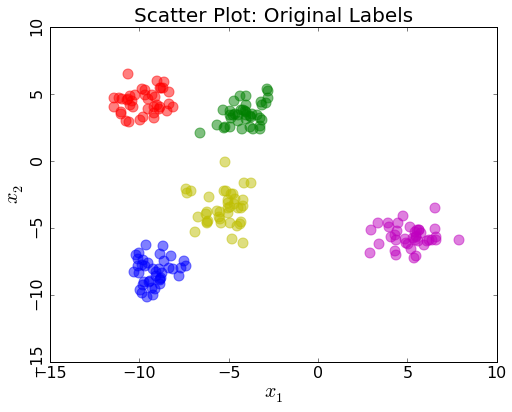

In [3]:
def plot_scatter(X, labels=None, title="Scatter Plot"):
    
    labels = np.zeros(shape=X.shape[0], dtype=int) if labels is None else labels
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    i = 0
    for lab in np.unique(labels):
        col_dict[lab] = colors[i]
        i += 1 
    
    fig1 = plt.figure(1, figsize=(8,6))
    ax = fig1.add_subplot(1, 1, 1)

    for i in np.unique(labels):
        indx = np.where(labels == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(title, size=20)

    plt.show()
    
## test plot original data
plot_scatter(df.iloc[:,0:2].values, labels=df.iloc[:,2].values, title="Scatter Plot: Original Labels")

### KMeans Clustering

** K = 5**

[[-9.1550525 -8.268995 ]
 [ 5.146985  -5.6687725]
 [-5.3052925 -3.52639  ]
 [-4.1274525  3.50063  ]
 [-9.7683175  4.44033  ]]


/home/vahid/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


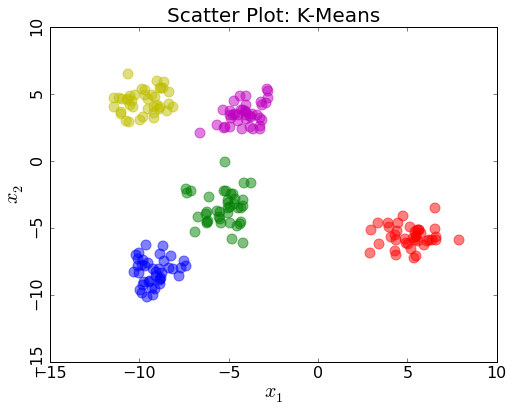

In [4]:
km = pyclust.KMeans(n_clusters=5)

km.fit(df.iloc[:,0:2].values)

print(km.centers_)

plot_scatter(df.iloc[:,0:2].values, labels=km.labels_, title="Scatter Plot: K-Means")

## Bisecting K-Means

Bisecting Step 1    : 0 [  46.1553349   899.23739761] [[ 5.146985   -5.6687725 ]
 [-7.08902875 -0.96360625]]
Bisecting Step 2    : 2 [ 250.21251074  244.37091781] [[-7.25556456 -5.97174177]
 [-6.92660494  3.9208716 ]]
Bisecting Step 3    : 3 [ 49.90278746  44.75086271] [[-5.30737179 -3.61558462]
 [-9.1550525  -8.268995  ]]
Bisecting Step 4    : 4 [ 47.36871877  45.00472211] [[-9.7683175   4.44033   ]
 [-4.15420244  3.41408293]]
[8 1 6 1 8 8 1 7 1 1 7 1 5 1 8 8 1 1 1 5 1 8 6 7 7 6 8 1 6 6 5 5 5 5 6 5 7
 5 8 7 8 7 5 8 5 8 7 1 1 6 1 7 5 1 5 6 5 8 6 7 1 8 7 6 8 5 6 7 1 5 1 6 7 1
 7 5 7 1 1 7 6 7 5 5 7 6 6 8 8 5 5 5 7 7 6 7 1 1 1 6 1 8 6 6 6 8 6 8 7 8 8
 6 6 7 5 6 7 5 7 6 1 6 8 6 1 7 8 6 1 1 6 7 1 7 5 7 7 1 5 8 5 7 5 8 1 8 8 6
 1 6 5 8 8 6 1 5 5 1 6 7 6 7 6 5 7 8 5 6 1 8 1 8 8 1 8 6 7 8 6 6 7 6 8 5 7
 7 5 5 1 8 5 8 8 8 5 5 7 8 7 5]


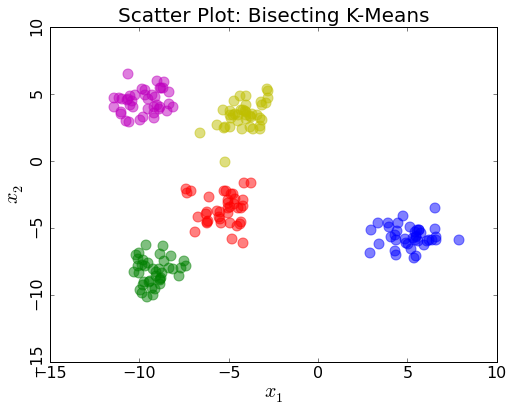

In [5]:
bkm = pyclust.BisectKMeans(n_clusters=5)

bkm.fit(df.iloc[:,0:2].values)

print(bkm.labels_)

plot_scatter(df.iloc[:,0:2].values, labels=bkm.labels_, title="Scatter Plot: Bisecting K-Means")

In [6]:
bkm.tree_.show(line_type='ascii')

b'0'
b'|-- 1'
b'+-- 2'
b'    |-- 3'
b'    |   |-- 5'
b'    |   +-- 6'
b'    +-- 4'
b'        |-- 7'
b'        +-- 8'


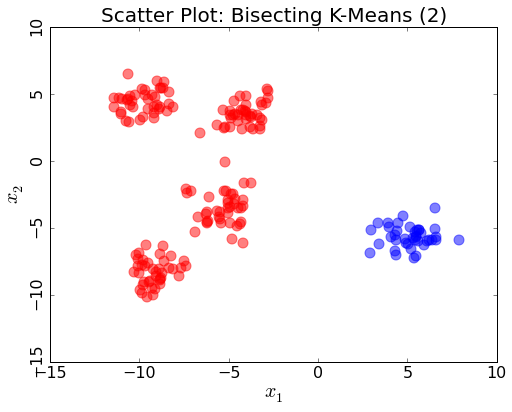

In [7]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(2), title="Scatter Plot: Bisecting K-Means (2)")

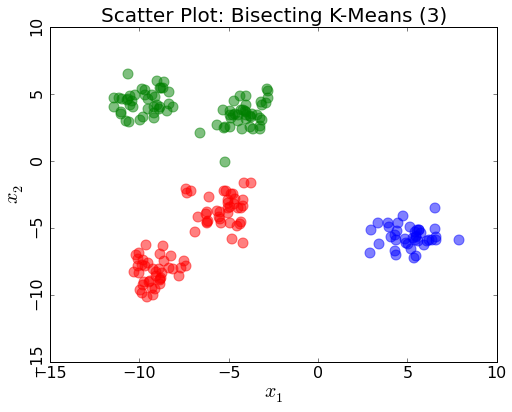

In [8]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(3), title="Scatter Plot: Bisecting K-Means (3)")

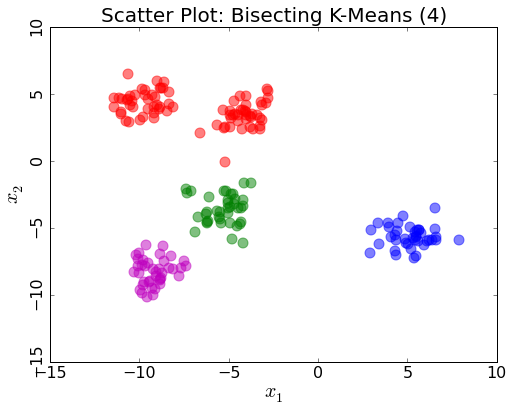

In [9]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(4), title="Scatter Plot: Bisecting K-Means (4)")

In [10]:
bkm.cut(3)

array([8, 2, 3, 2, 8, 8, 2, 7, 2, 2, 7, 2, 3, 2, 8, 8, 2, 2, 2, 3, 2, 8, 3,
       7, 7, 3, 8, 2, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 8, 7, 8, 7, 3, 8, 3, 8,
       7, 2, 2, 3, 2, 7, 3, 2, 3, 3, 3, 8, 3, 7, 2, 8, 7, 3, 8, 3, 3, 7, 2,
       3, 2, 3, 7, 2, 7, 3, 7, 2, 2, 7, 3, 7, 3, 3, 7, 3, 3, 8, 8, 3, 3, 3,
       7, 7, 3, 7, 2, 2, 2, 3, 2, 8, 3, 3, 3, 8, 3, 8, 7, 8, 8, 3, 3, 7, 3,
       3, 7, 3, 7, 3, 2, 3, 8, 3, 2, 7, 8, 3, 2, 2, 3, 7, 2, 7, 3, 7, 7, 2,
       3, 8, 3, 7, 3, 8, 2, 8, 8, 3, 2, 3, 3, 8, 8, 3, 2, 3, 3, 2, 3, 7, 3,
       7, 3, 3, 7, 8, 3, 3, 2, 8, 2, 8, 8, 2, 8, 3, 7, 8, 3, 3, 7, 3, 8, 3,
       7, 7, 3, 3, 2, 8, 3, 8, 8, 8, 3, 3, 7, 8, 7, 3])